<a href="https://colab.research.google.com/github/FaustinoAndres/superstore-dataviz/blob/main/superstore_dataviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esta base de datos es una recopilación sobre la información de ventas de una tienda de Estados Unidos, cuya giro es la venta de productos y materiales clasificados de la siguiente manera:

1.   Furniture
2.   Office Supplies
3.   Technology

La base de datos abarca los años del 2011 al 2014 y contiene datos pertinentes sobre los descuentos aplicados, nombre de los clientes y la ubicación geográfica de los clientes por cada transacción realizada.


1. ¿Cuál es la categoría de productos más vendida?
2. ¿Quién es el cliente que compra más?
3. ¿En qué Trimestre (Q) se realizan más ventas?



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/FaustinoAndres/superstore-dataviz/main/superstore.csv"


In [ ]:
df = pd.read_csv(url, sep=';')
print(df.head(5))

   Row ID        Order ID  Order Date  ... Quantity Discount    Profit
0       1  CA-2016-152156  08-11-2016  ...        2        0   41,9136
1       2  CA-2016-152156  08-11-2016  ...        3        0   219,582
2       3  CA-2016-138688  12-06-2016  ...        2        0    6,8714
3       4  US-2015-108966  11-10-2015  ...        5     0,45  -383,031
4       5  US-2015-108966  11-10-2015  ...        2      0,2    2,5164

[5 rows x 21 columns]


In [ ]:
df = df.set_index('Row ID')
print(df.head(5))
df.dtypes

              Order ID  Order Date   Ship Date  ... Quantity Discount    Profit
Row ID                                          ...                            
1       CA-2016-152156  08-11-2016  11-11-2016  ...        2        0   41,9136
2       CA-2016-152156  08-11-2016  11-11-2016  ...        3        0   219,582
3       CA-2016-138688  12-06-2016  16-06-2016  ...        2        0    6,8714
4       US-2015-108966  11-10-2015  18-10-2015  ...        5     0,45  -383,031
5       US-2015-108966  11-10-2015  18-10-2015  ...        2      0,2    2,5164

[5 rows x 20 columns]


Order ID         object
Order Date       object
Ship Date        object
Ship Mode        object
Customer ID      object
Customer Name    object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Product ID       object
Category         object
Sub-Category     object
Product Name     object
Sales            object
Quantity          int64
Discount         object
Profit           object
dtype: object

Primero aseguremonos de tener algún dato tipo `NaN`

In [ ]:
df.isna().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [ ]:
df = df.convert_dtypes()
df.dtypes

Order ID         string
Order Date       string
Ship Date        string
Ship Mode        string
Customer ID      string
Customer Name    string
Segment          string
Country          string
City             string
State            string
Postal Code       Int64
Region           string
Product ID       string
Category         string
Sub-Category     string
Product Name     string
Sales            string
Quantity          Int64
Discount         string
Profit           string
dtype: object

In [ ]:
#Las Columnas 'Order Date' y 'Ship Date' corresponden al tipo datetime, 
#hacemos la transformación desde String -> datetime

df['Order Date'] = pd.to_datetime(
df['Order Date'],
dayfirst = True,
errors = 'coerce'
)

df['Ship Date'] = pd.to_datetime(
df['Ship Date'],
dayfirst = True,
errors = 'coerce'
)

#Los valores de las columnas 'Sales', 'Discount' y 'Profit' son String
# y su parte decimal está con una coma (,).
# remplazaremos las comas por puntos (.)

df['Sales'] = df['Sales'].str.replace(',','.')
df['Discount'] = df['Discount'].str.replace(',','.')
df['Profit'] = df['Profit'].str.replace(',','.')

#Además debemos trasformar las columnas 'Sales', 'Discount' y 'Profit' desde
# String -> Float 
df['Sales'] = df['Sales'].astype(float)
df['Discount'] = df['Discount'].astype(float)
df['Profit'] = df['Profit'].astype(float)

#Codigo postal, corresponde a una variable categórica, con lo cual haremos la transformación
#int64 -> string
df = df.astype({"Postal Code": str})

#Comprobaremos que los cambias tengan efecto imprimiendo df.dtypes
df.dtypes

Order ID                 string
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                string
Customer ID              string
Customer Name            string
Segment                  string
Country                  string
City                     string
State                    string
Postal Code              object
Region                   string
Product ID               string
Category                 string
Sub-Category             string
Product Name             string
Sales                   float64
Quantity                  Int64
Discount                float64
Profit                  float64
dtype: object

In [ ]:
df.describe()


,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


Las ventas están separadas por categorías, las representamos en un diagrama de barras

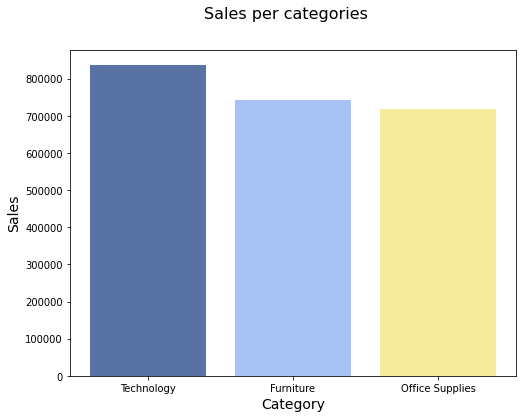

In [ ]:
category_sales = df.groupby(['Category'])['Sales'].sum().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel('Category', fontsize=14)
ax.set_ylabel('Sales', fontsize=14)
ax.bar(category_sales.index, category_sales.values, color=('#5872A6', '#A9C2F5', '#F5ED9D'))
fig.suptitle('Sales per categories', fontsize=16)
plt.show()

¿Quién es nuestro mejor cliente?

In [ ]:
best_customers = df.groupby(['Customer Name'])['Sales'].sum().sort_values(ascending=False).head(10)
best_customers

Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64

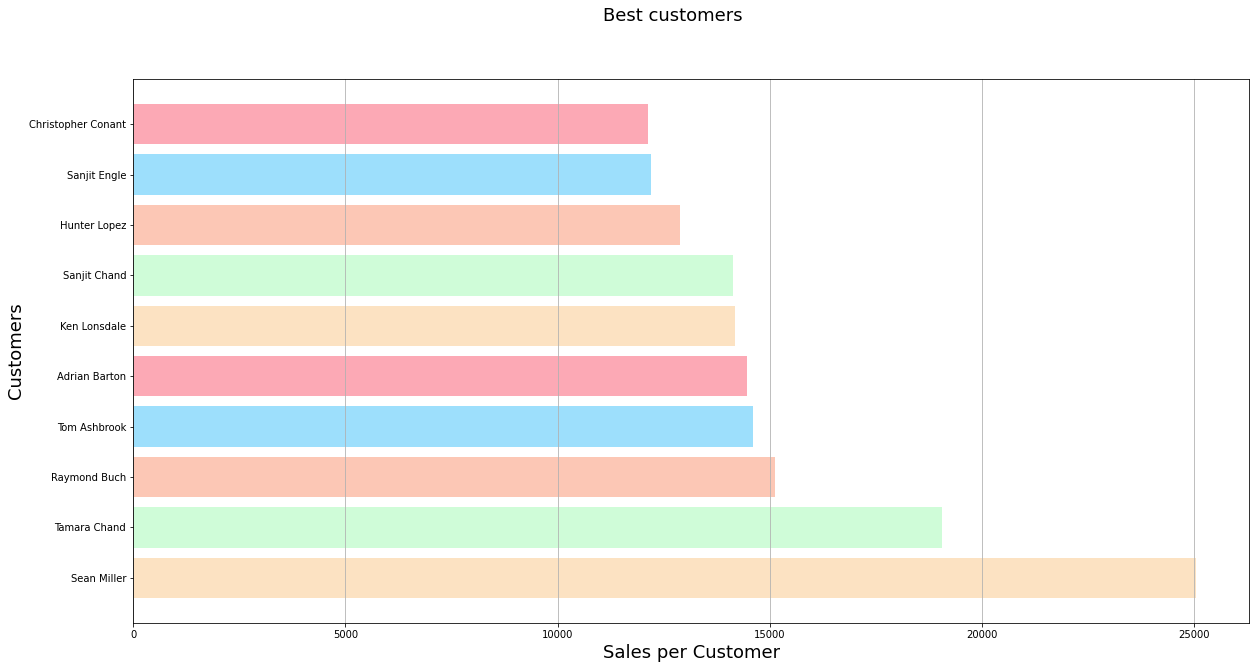

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax.barh(best_customers.index, best_customers.values, color=('#FCE2C2', '#CFFCD8', '#FCC7B5', '#9DDFFC', '#FCA9B5'))
fig.suptitle('Best customers', fontsize=18)
ax.grid(axis='x')
ax.set_xlabel('Sales per Customer', fontsize=18)
ax.set_ylabel('Customers', fontsize=18)
plt.show()

¿Cuál es el trimestre con más ventas?


In [ ]:
sale_by_date = df.groupby(['Order Date']).sum()
sale_by_date['Quarter'] = sale_by_date.index.quarter
sale_by_date['Year'] = sale_by_date.index.year
sale_by_date.head()

,Sales,Quantity,Discount,Profit,Quarter,Year
Order Date,,,,,,
2014-01-03,16.448,2,0.2,5.5512,1,2014
2014-01-04,288.060,8,1.2,-65.9901,1,2014
2014-01-05,19.536,3,0.2,4.8840,1,2014
2014-01-06,4407.100,30,0.0,1358.0524,1,2014
2014-01-07,87.158,10,1.4,-71.9621,1,2014


In [ ]:
sale_by_date.groupby(['Year']).sum()

,Sales,Quantity,Discount,Profit,Quarter
Year,,,,,
2014,484247.4981,7581,315.46,49543.9741,792
2015,470532.5090,7979,327.09,61618.6037,758
2016,609205.5980,9837,400.32,81795.1743,816
2017,733215.2552,12476,518.22,93439.2696,831


In [ ]:
pivot_df = pd.pivot_table(
    sale_by_date,
    index = 'Year',
    values = 'Quantity',
    aggfunc = np.sum,
    columns = 'Quarter'
)
pivot_df.head()

Quarter,1,2,3,4
Year,,,,
2014,1028,1523,2159,2871
2015,990,1604,2241,3144
2016,1243,2240,2767,3587
2017,1845,2551,3384,4696


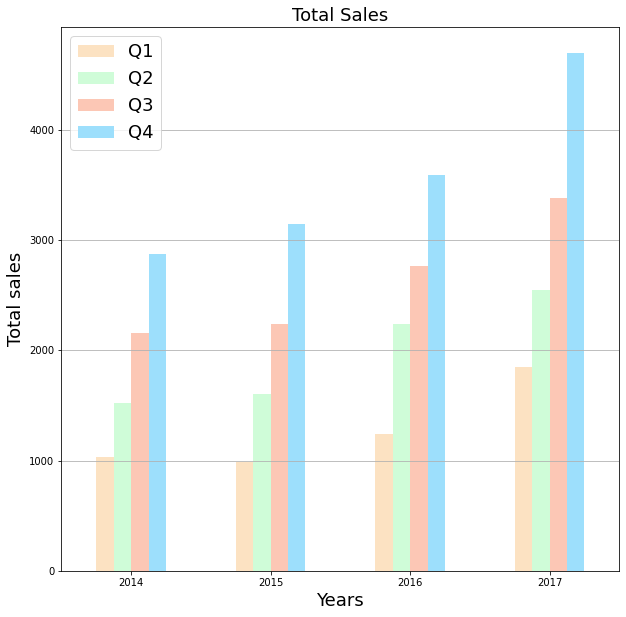

In [ ]:
ax = pivot_df.plot.bar(rot=0, figsize=(10,10), color=('#FCE2C2', '#CFFCD8', '#FCC7B5', '#9DDFFC'))
plt.xlabel('Years', fontsize=18)
plt.ylabel('Total sales', fontsize=18)
plt.title('Total Sales', fontsize=18)
plt.legend(labels=['Q1', 'Q2', 'Q3', 'Q4'], loc='upper left', fontsize=18)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Es momentos de hacer nuestra hipótesis, la cual será "a mayores ventas, mayor será la utilidad"

Para ello utilizaremos un scatter plot, y esperaremos que existe una relación lineal positiva entre las ventas y la utilidad.

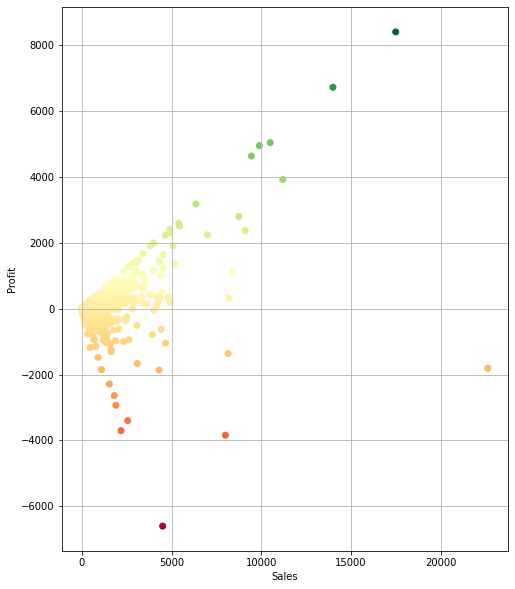

In [ ]:
import matplotlib.cm as cm

sales = df.iloc[:, -4].values
profit = df.iloc[:, -1].values

hypothesis_x = np.linspace()

fig, ax = plt.subplots(figsize=(8,10))
plt.scatter(, , c=df.iloc[:, -1].values, cmap='RdYlGn')
plt.plot(np.linspace())
plt.grid()
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()